In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
all_Feature_File = pd.read_csv('Titanic-Dataset.csv')
all_Feature_File.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
all_Feature_File1 = all_Feature_File[['Age', 'Fare', 'SibSp', 'Parch','Survived','Pclass']]
all_Feature_File1.head()


,Age,Fare,SibSp,Parch,Survived,Pclass
0,22.0,7.2500,1,0,0,3
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,3
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,3


In [29]:
all_Feature_File1.isnull().sum().sum()

np.int64(177)

Filled all age value with mean

In [30]:
all_Feature_File1['Age'] = all_Feature_File1['Age'].fillna(all_Feature_File1['Age'].mean())

/tmp/ipython-input-30-2601170445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_Feature_File1['Age'] = all_Feature_File1['Age'].fillna(all_Feature_File1['Age'].mean())


In [31]:
all_Feature_File1.isnull().sum().sum() #give zero null value

np.int64(0)

In [40]:
all_Feature_File1['Age'] = all_Feature_File1['Age'].astype(int)
all_Feature_File1.head()

/tmp/ipython-input-40-1244904404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_Feature_File1['Age'] = all_Feature_File1['Age'].astype(int)


,Age,Fare,SibSp,Parch,Survived,Pclass
0,22,7.2500,1,0,0,3
1,38,71.2833,1,0,1,1
2,26,7.9250,0,0,1,3
3,35,53.1000,1,0,1,1
4,35,8.0500,0,0,0,3


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Age', 'Fare']  # Use list, not DataFrame
df_scaled = all_Feature_File1.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(all_Feature_File1[columns_to_scale])


In [42]:
df_scaled.head()

,Age,Fare,SibSp,Parch,Survived,Pclass
0,-0.580044,-0.502445,1,0,0,3
1,0.650112,0.786845,1,0,1,1
2,-0.272505,-0.488854,0,0,1,3
3,0.419458,0.420730,1,0,1,1
4,0.419458,-0.486337,0,0,0,3


In [47]:
x = df_scaled.drop('Survived' ,axis= 1)
y = df_scaled['Survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [49]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()

In [50]:
print(X_train)

          Age      Fare  SibSp  Parch  Pclass
331  1.188306 -0.074583      0      0       1
733 -0.503160 -0.386671      0      0       2
382  0.188804 -0.488854      0      0       3
704 -0.272505 -0.490280      1      0       3
813 -1.810201 -0.018709      4      2       3
..        ...       ...    ...    ...     ...
106 -0.656929 -0.494391      0      0       3
270 -0.041851 -0.024246      0      0       1
860  0.880767 -0.364355      2      0       3
435 -1.195123  1.767741      1      2       1
102 -0.656929  0.907738      0      1       1

[712 rows x 5 columns]


In [55]:
model.fit(X_train, Y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0]


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.7318435754189944
Confusion Matrix:
 [[94 11]
 [37 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179



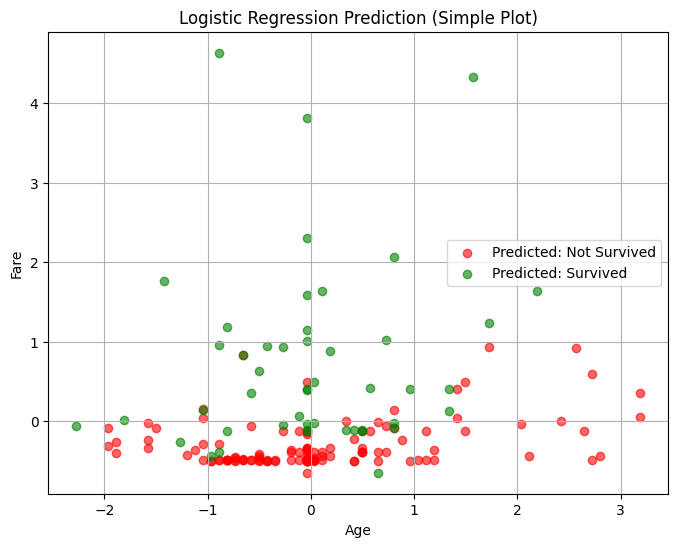

In [59]:
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)


plt.figure(figsize=(8, 6))


plt.scatter(X_test[y_pred == 0]['Age'], X_test[y_pred == 0]['Fare'],
            color='red', label='Predicted: Not Survived', alpha=0.6)


plt.scatter(X_test[y_pred == 1]['Age'], X_test[y_pred == 1]['Fare'],
            color='green', label='Predicted: Survived', alpha=0.6)


plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Logistic Regression Prediction (Simple Plot)')
plt.legend()
plt.grid(True)
plt.show()
